## Sequential Forward Selection (SFS)

### 1.Unbalanced Data

#### Import dataset

In [1]:
import pandas as pd
df = pd.read_csv("Finaltest.csv")

In [2]:
df.head()

,enrollment_id,username,course_id,source_browser,source_server,event_access,event_discussion,event_navigate,event_page_close,event_problem,event_video,event_wiki,Target
0,1,9Uee7oEuuMmgPx2IzPfFkWgkHZyPbWr0,0,195,119,107,0,25,66,87,29,0,0
1,3,1qXC7Fjbwp66GPQc6pHLfEuO8WKozxG4,0,200,88,79,26,14,22,138,9,0,0
2,4,FIHlppZyoq8muPbdVxS44gfvceX9zvU7,0,19,80,64,0,15,10,6,4,0,0
3,5,p1Mp7WkVfzUijX0peVQKSHbgd5pXyl4c,0,431,202,226,34,30,87,170,86,0,0
4,6,dpK33RH9yepUAnyoywRwBt1AJzxGlaja,0,6,17,12,0,5,2,2,2,0,0


In [3]:
df.shape

(120542, 13)

In [4]:
#Check missing value
df.isnull().sum()

enrollment_id       0
username            0
course_id           0
source_browser      0
source_server       0
event_access        0
event_discussion    0
event_navigate      0
event_page_close    0
event_problem       0
event_video         0
event_wiki          0
Target              0
dtype: int64

In [5]:
#check if any missing value
df[df.isnull().any(axis=1)]

,enrollment_id,username,course_id,source_browser,source_server,event_access,event_discussion,event_navigate,event_page_close,event_problem,event_video,event_wiki,Target


#### Drop columns

In [6]:
df=df.drop(columns='enrollment_id')
df=df.drop(columns='username')

In [7]:
df.shape

(120542, 11)

### Target Feature and Dependent Feature

In [8]:
X = df.iloc[:,0:10] # all columns/features except target 
y = df.iloc[:,-1]  #target

In [9]:
X

,course_id,source_browser,source_server,event_access,event_discussion,event_navigate,event_page_close,event_problem,event_video,event_wiki
0,0,195,119,107,0,25,66,87,29,0
1,0,200,88,79,26,14,22,138,9,0
2,0,19,80,64,0,15,10,6,4,0
3,0,431,202,226,34,30,87,170,86,0
4,0,6,17,12,0,5,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...
120537,0,0,1,0,0,1,0,0,0,0
120538,0,0,1,0,0,1,0,0,0,0
120539,0,3,5,3,0,2,2,0,1,0
120540,0,0,1,0,0,1,0,0,0,0


In [10]:
y

0         0
1         0
2         0
3         0
4         0
         ..
120537    1
120538    1
120539    1
120540    1
120541    1
Name: Target, Length: 120542, dtype: int64

### Split and Train Data

In [11]:
from sklearn.model_selection import StratifiedKFold, train_test_split

#training 0.3,
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,stratify=y, random_state=42)

### Feature Selection Models

In [12]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [14]:
X_train.shape

(84379, 10)

### Algorithms

In [15]:
ffs_lr=SequentialFeatureSelector(LogisticRegression(),k_features="best",forward=False,floating=True, verbose=2,scoring= "f1",cv= 5, n_jobs=-1).fit(X_train, y_train)  
ffs_lr.subsets_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    4.1s remaining:    9.7s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.3s finished

[2022-11-21 00:22:50] Features: 9/1 -- score: 0.9134457446867513[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:    1.7s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    2.5s finished

[2022-11-21 00:22:52] Features: 8/1 -- score: 0.9138395928803877[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    1.1s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.7s finished

[2022-11-21 00:22:55] Features: 7/

{10: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9),
  'cv_scores': array([0.91159635, 0.91279008, 0.91696725, 0.91347377, 0.91236894]),
  'avg_score': 0.9134392810903995,
  'feature_names': ('course_id',
   'source_browser',
   'source_server',
   'event_access',
   'event_discussion',
   'event_navigate',
   'event_page_close',
   'event_problem',
   'event_video',
   'event_wiki')},
 9: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 9),
  'cv_scores': array([0.91159635, 0.91279008, 0.91696725, 0.91347377, 0.91240126]),
  'avg_score': 0.9134457446867513,
  'feature_names': ('course_id',
   'source_browser',
   'source_server',
   'event_access',
   'event_discussion',
   'event_navigate',
   'event_page_close',
   'event_problem',
   'event_wiki')},
 8: {'feature_idx': (0, 1, 2, 4, 5, 6, 7, 9),
  'cv_scores': array([0.91194857, 0.91294217, 0.91717043, 0.91397469, 0.91316209]),
  'avg_score': 0.9138395928803877,
  'feature_names': ('course_id',
   'source_browser',
   'source_server',
   'e

In [16]:
ffs_naivebayes=SequentialFeatureSelector(GaussianNB(),k_features="best",forward=False,floating=True, verbose=2,scoring= "f1",cv= 5, n_jobs=-1).fit(X_train, y_train)  
ffs_naivebayes.subsets_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.3s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.3s finished

[2022-11-21 00:23:07] Features: 9/1 -- score: 0.9103537921666689[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:    0.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.2s finished

[2022-11-21 00:23:07] Features: 8/1 -- score: 0.9109205595183957[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    0.2s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.1s finished

[2022-11-21 00:23:08] Features: 7/

{10: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9),
  'cv_scores': array([0.90807839, 0.90834493, 0.91080047, 0.90915591, 0.91065292]),
  'avg_score': 0.9094065250002592,
  'feature_names': ('course_id',
   'source_browser',
   'source_server',
   'event_access',
   'event_discussion',
   'event_navigate',
   'event_page_close',
   'event_problem',
   'event_video',
   'event_wiki')},
 9: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8),
  'cv_scores': array([0.90929883, 0.90933781, 0.91215007, 0.90995634, 0.91102591]),
  'avg_score': 0.9103537921666689,
  'feature_names': ('course_id',
   'source_browser',
   'source_server',
   'event_access',
   'event_discussion',
   'event_navigate',
   'event_page_close',
   'event_problem',
   'event_video')},
 8: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 8),
  'cv_scores': array([0.90977954, 0.90983167, 0.91313681, 0.91064652, 0.91120826]),
  'avg_score': 0.9109205595183957,
  'feature_names': ('course_id',
   'source_browser',
   'source_server',
   '

In [17]:
ffs_dtree=SequentialFeatureSelector(DecisionTreeClassifier(),k_features= "best",forward=False,floating=True,verbose=2,scoring= "f1", cv= 5, n_jobs=-1).fit(X_train, y_train)
ffs_dtree.subsets_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    1.3s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.4s finished

[2022-11-21 00:23:13] Features: 9/1 -- score: 0.8777743981881541[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:    1.0s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    1.1s finished

[2022-11-21 00:23:15] Features: 8/1 -- score: 0.878478638174296[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    0.7s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.7s finished

[2022-11-21 00:23:17] Features: 7/1

{10: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9),
  'cv_scores': array([0.87942265, 0.87725138, 0.87590862, 0.87764933, 0.87569092]),
  'avg_score': 0.8771845774430673,
  'feature_names': ('course_id',
   'source_browser',
   'source_server',
   'event_access',
   'event_discussion',
   'event_navigate',
   'event_page_close',
   'event_problem',
   'event_video',
   'event_wiki')},
 9: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 9),
  'cv_scores': array([0.87743176, 0.87688665, 0.87655602, 0.879855  , 0.87814256]),
  'avg_score': 0.8777743981881541,
  'feature_names': ('course_id',
   'source_browser',
   'source_server',
   'event_access',
   'event_discussion',
   'event_navigate',
   'event_page_close',
   'event_problem',
   'event_wiki')},
 8: {'feature_idx': (0, 1, 2, 4, 5, 6, 7, 9),
  'cv_scores': array([0.87696413, 0.87868271, 0.87798016, 0.87961524, 0.87915095]),
  'avg_score': 0.878478638174296,
  'feature_names': ('course_id',
   'source_browser',
   'source_server',
   'ev

In [18]:
ffs_mlp= SequentialFeatureSelector(MLPClassifier(max_iter=2000),k_features="best",forward=False,floating=True,verbose=2,scoring= "f1", cv= 5, n_jobs=-1).fit(X_train, y_train)
ffs_mlp.subsets_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:   56.8s remaining:  2.2min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.4min finished

[2022-11-21 00:25:28] Features: 9/1 -- score: 0.9152162676354646[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:   47.3s remaining:  1.6min
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  1.2min finished

[2022-11-21 00:26:38] Features: 8/1 -- score: 0.9155471827917403[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:   37.5s remaining:  1.9min
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   59.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   59.4s finished

[2022-11-21 00:28:36] Features: 7/

{10: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9),
  'cv_scores': array([0.91042074, 0.91353642, 0.91716277, 0.91469194, 0.91438173]),
  'avg_score': 0.9140387201638159,
  'feature_names': ('course_id',
   'source_browser',
   'source_server',
   'event_access',
   'event_discussion',
   'event_navigate',
   'event_page_close',
   'event_problem',
   'event_video',
   'event_wiki')},
 9: {'feature_idx': (0, 1, 2, 3, 4, 6, 7, 8, 9),
  'cv_scores': array([0.91415213, 0.91397051, 0.91847612, 0.9151806 , 0.91430197]),
  'avg_score': 0.9152162676354646,
  'feature_names': ('course_id',
   'source_browser',
   'source_server',
   'event_access',
   'event_discussion',
   'event_page_close',
   'event_problem',
   'event_video',
   'event_wiki')},
 8: {'feature_idx': (0, 1, 2, 4, 6, 7, 8, 9),
  'cv_scores': array([0.91395902, 0.91451178, 0.91849833, 0.91606404, 0.91470274]),
  'avg_score': 0.9155471827917403,
  'feature_names': ('course_id',
   'source_browser',
   'source_server',
   'even

In [19]:
ffs_randomforest = SequentialFeatureSelector(RandomForestClassifier(),k_features="best",forward=False,floating=True,verbose=2,scoring= "f1", cv= 5, n_jobs=-1).fit(X_train, y_train)   
ffs_randomforest.subsets_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:   37.5s remaining:  1.5min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   39.8s finished

[2022-11-21 00:41:31] Features: 9/1 -- score: 0.911306471347646[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:   28.7s remaining:   57.5s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   29.7s finished

[2022-11-21 00:42:01] Features: 8/1 -- score: 0.9111140226098682[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:   26.0s remaining:  1.3min
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   27.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   20.6s finished

[2022-11-21 00:42:50] Features: 7/1

{10: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9),
  'cv_scores': array([0.90899903, 0.90960187, 0.91396374, 0.91202834, 0.91041215]),
  'avg_score': 0.9110010237172392,
  'feature_names': ('course_id',
   'source_browser',
   'source_server',
   'event_access',
   'event_discussion',
   'event_navigate',
   'event_page_close',
   'event_problem',
   'event_video',
   'event_wiki')},
 9: {'feature_idx': (1, 2, 3, 4, 5, 6, 7, 8, 9),
  'cv_scores': array([0.91066657, 0.90922221, 0.91443232, 0.91235679, 0.90985446]),
  'avg_score': 0.911306471347646,
  'feature_names': ('source_browser',
   'source_server',
   'event_access',
   'event_discussion',
   'event_navigate',
   'event_page_close',
   'event_problem',
   'event_video',
   'event_wiki')},
 8: {'feature_idx': (1, 2, 3, 4, 5, 6, 8, 9),
  'cv_scores': array([0.90974052, 0.90960268, 0.91487209, 0.91106134, 0.91029348]),
  'avg_score': 0.9111140226098682,
  'feature_names': ('source_browser',
   'source_server',
   'event_access',
 

In [20]:
ffs_knn= SequentialFeatureSelector(KNeighborsClassifier(),k_features="best",forward=False, floating=True,verbose=2,scoring= "f1",cv= 5, n_jobs=-1).fit(X_train, y_train)
ffs_knn.subsets_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:   15.6s remaining:   36.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   17.0s finished

[2022-11-21 00:50:40] Features: 9/1 -- score: 0.9056014759945029[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:   10.3s remaining:   20.8s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   12.4s finished

[2022-11-21 00:50:53] Features: 8/1 -- score: 0.9061982973551412[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    9.1s remaining:   27.4s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   10.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    5.4s finished

[2022-11-21 00:51:09] Features: 7/

{10: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9),
  'cv_scores': array([0.90529741, 0.90311594, 0.90801895, 0.90470665, 0.90399333]),
  'avg_score': 0.9050264572765577,
  'feature_names': ('course_id',
   'source_browser',
   'source_server',
   'event_access',
   'event_discussion',
   'event_navigate',
   'event_page_close',
   'event_problem',
   'event_video',
   'event_wiki')},
 9: {'feature_idx': (0, 1, 3, 4, 5, 6, 7, 8, 9),
  'cv_scores': array([0.90286624, 0.90480324, 0.90947201, 0.90632471, 0.90454117]),
  'avg_score': 0.9056014759945029,
  'feature_names': ('course_id',
   'source_browser',
   'event_access',
   'event_discussion',
   'event_navigate',
   'event_page_close',
   'event_problem',
   'event_video',
   'event_wiki')},
 8: {'feature_idx': (0, 1, 3, 5, 6, 7, 8, 9),
  'cv_scores': array([0.90493085, 0.90555515, 0.90890007, 0.90796128, 0.90364414]),
  'avg_score': 0.9061982973551412,
  'feature_names': ('course_id',
   'source_browser',
   'event_access',
   'even

In [55]:
ffs_svc= SequentialFeatureSelector(SVC(),k_features="best",forward=False, floating=False,verbose=2,scoring= "f1",cv= 5, n_jobs=-1).fit(X_train, y_train)
ffs_svc.subsets_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed: 60.7min remaining: 141.6min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 72.6min finished

[2022-11-21 02:37:56] Features: 9/1 -- score: 0.9152491569764681[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed: 48.6min remaining: 97.2min
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed: 57.6min finished

[2022-11-21 03:35:32] Features: 8/1 -- score: 0.9153711118388305[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed: 50.1min remaining: 150.4min
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed: 58.4min finished

[2022-11-21 04:33:55] Features: 7/1 -- score: 0.9153919370350208[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of 

{10: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9),
  'cv_scores': array([0.91277703, 0.9142796 , 0.91762609, 0.91551054, 0.91454487]),
  'avg_score': 0.91494762506341,
  'feature_names': ('course_id',
   'source_browser',
   'source_server',
   'event_access',
   'event_discussion',
   'event_navigate',
   'event_page_close',
   'event_problem',
   'event_video',
   'event_wiki')},
 9: {'feature_idx': (0, 1, 3, 4, 5, 6, 7, 8, 9),
  'cv_scores': array([0.91319679, 0.9144385 , 0.91776867, 0.91561542, 0.9152264 ]),
  'avg_score': 0.9152491569764681,
  'feature_names': ('course_id',
   'source_browser',
   'event_access',
   'event_discussion',
   'event_navigate',
   'event_page_close',
   'event_problem',
   'event_video',
   'event_wiki')},
 8: {'feature_idx': (0, 1, 3, 5, 6, 7, 8, 9),
  'cv_scores': array([0.91324949, 0.91449363, 0.91795329, 0.91567726, 0.91548189]),
  'avg_score': 0.9153711118388305,
  'feature_names': ('course_id',
   'source_browser',
   'event_access',
   'event_

### Significant Features

In [21]:
ffs_lr.k_feature_idx_ 

(0, 1, 2, 4, 5, 6, 9)

In [22]:
ffs_naivebayes.k_feature_idx_ 

(0, 2, 3, 6)

In [23]:
ffs_dtree.k_feature_idx_ 

(0, 2)

In [24]:
ffs_mlp.k_feature_idx_ 

(0, 1, 2, 4, 6, 7, 8, 9)

In [25]:
ffs_randomforest.k_feature_idx_ 

(1, 2, 3, 4, 5, 6, 7, 8, 9)

In [56]:
ffs_svc.k_feature_idx_ 

(1, 3, 5, 6, 7, 8, 9)

In [ ]:
ffs_knn.k_feature_idx_ 

### Name of Significant Features

In [27]:
ffs_lr.k_feature_names_ #name of the features choosen

('course_id',
 'source_browser',
 'source_server',
 'event_discussion',
 'event_navigate',
 'event_page_close',
 'event_wiki')

In [28]:
ffs_naivebayes.k_feature_names_ #name of the features choosen

('course_id', 'source_server', 'event_access', 'event_page_close')

In [29]:
ffs_dtree.k_feature_names_ #name of the features choosen

('course_id', 'source_server')

In [30]:
ffs_mlp.k_feature_names_ #name of the features choosen

('course_id',
 'source_browser',
 'source_server',
 'event_discussion',
 'event_page_close',
 'event_problem',
 'event_video',
 'event_wiki')

In [31]:
ffs_randomforest.k_feature_names_ #name of the features choosen

('source_browser',
 'source_server',
 'event_access',
 'event_discussion',
 'event_navigate',
 'event_page_close',
 'event_problem',
 'event_video',
 'event_wiki')

In [32]:
ffs_svc.k_feature_names_ #name of the features choosen

NameError: name 'ffs_svc' is not defined

In [33]:
ffs_knn.k_feature_names_ #name of the features choosen

('course_id',
 'source_browser',
 'event_access',
 'event_navigate',
 'event_page_close',
 'event_problem',
 'event_video')

#### Highest Fscore based on Algorithms

In [34]:
ffs_lr.k_score_

0.91390122582836

In [35]:
ffs_naivebayes.k_score_

0.9129905930641341

In [36]:
ffs_dtree.k_score_

0.911398671508663

In [37]:
ffs_mlp.k_score_

0.9155471827917403

In [38]:
ffs_randomforest.k_score_

0.911306471347646

In [39]:
ffs_svc.k_score_

NameError: name 'ffs_svc' is not defined

In [40]:
ffs_knn.k_score_

0.9066824051688682

### Tabulated Result and Graph

In [41]:
download=pd.DataFrame.from_dict(ffs_naivebayes.get_metric_dict()).T
download.to_csv("backwardfloating.gaussian.csv")
pd.DataFrame.from_dict(ffs_naivebayes.get_metric_dict()).T
#ci_bound = cinfidence interval
#std_dev = standard deviation
#std_err = standard error

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)","[0.9080783921750617, 0.9083449284669449, 0.910...",0.909407,"(course_id, source_browser, source_server, eve...",0.00146,0.001136,0.000568
9,"(0, 1, 2, 3, 4, 5, 6, 7, 8)","[0.9092988349653348, 0.9093378122431476, 0.912...",0.910354,"(course_id, source_browser, source_server, eve...",0.001406,0.001094,0.000547
8,"(0, 1, 2, 3, 4, 5, 6, 8)","[0.9097795405009468, 0.9098316714913691, 0.913...",0.910921,"(course_id, source_browser, source_server, eve...",0.00158,0.001229,0.000615
7,"(0, 1, 2, 3, 4, 5, 6)","[0.9107060040669259, 0.9099925082943884, 0.914...",0.911581,"(course_id, source_browser, source_server, eve...",0.002054,0.001598,0.000799
6,"(0, 2, 3, 4, 5, 6)","[0.9115142012045188, 0.9104435110699792, 0.915...",0.91215,"(course_id, source_server, event_access, event...",0.00217,0.001688,0.000844
5,"(0, 2, 3, 5, 6)","[0.9117952761549765, 0.91131892937762, 0.91558...",0.912912,"(course_id, source_server, event_access, event...",0.002031,0.00158,0.00079
4,"(0, 2, 3, 6)","[0.9111776447105788, 0.9123707664884135, 0.915...",0.912991,"(course_id, source_server, event_access, event...",0.001779,0.001384,0.000692
3,"(2, 3, 6)","[0.9111776447105788, 0.9123707664884135, 0.915...",0.912991,"(source_server, event_access, event_page_close)",0.001779,0.001384,0.000692
2,"(2, 6)","[0.9118316268486917, 0.9115525390000355, 0.914...",0.912716,"(source_server, event_page_close)",0.001299,0.00101,0.000505
1,"(2,)","[0.9093259722561935, 0.9114321608040201, 0.912...",0.910886,"(source_server,)",0.001286,0.001,0.0005


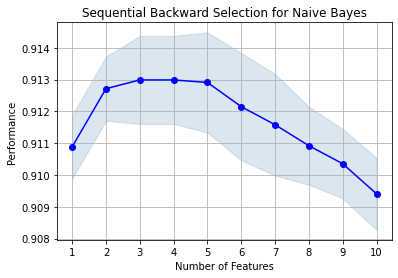

In [42]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig1 = plot_sfs(ffs_naivebayes.get_metric_dict(), kind='std_dev')

plt.title('Sequential Backward Selection for Naive Bayes')
plt.grid()
plt.show()

In [43]:
download=pd.DataFrame.from_dict(ffs_dtree.get_metric_dict()).T
download.to_csv("backwardfloating.desiciontree.csv")
pd.DataFrame.from_dict(ffs_dtree.get_metric_dict()).T
#ci_bound = cinfidence interval
#std_dev = standard deviation
#std_err = standard error

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)","[0.8794226498889712, 0.8772513776397056, 0.875...",0.877185,"(course_id, source_browser, source_server, eve...",0.001733,0.001348,0.000674
9,"(0, 1, 2, 3, 4, 5, 6, 7, 9)","[0.8774317627043421, 0.8768866528558745, 0.876...",0.877774,"(course_id, source_browser, source_server, eve...",0.001505,0.001171,0.000585
8,"(0, 1, 2, 4, 5, 6, 7, 9)","[0.8769641268900088, 0.8786827143173596, 0.877...",0.878479,"(course_id, source_browser, source_server, eve...",0.001196,0.00093,0.000465
7,"(0, 1, 2, 4, 6, 7, 9)","[0.881464564608811, 0.881959255718173, 0.88178...",0.881425,"(course_id, source_browser, source_server, eve...",0.000671,0.000522,0.000261
6,"(0, 2, 4, 6, 7, 9)","[0.886166935602171, 0.8857906100193947, 0.8874...",0.886176,"(course_id, source_server, event_discussion, e...",0.001878,0.001461,0.00073
5,"(0, 2, 4, 7, 9)","[0.8931799208740154, 0.8918144561708918, 0.895...",0.893279,"(course_id, source_server, event_discussion, e...",0.001546,0.001203,0.000601
4,"(0, 2, 4, 9)","[0.9008341722997267, 0.8963350785340315, 0.900...",0.899302,"(course_id, source_server, event_discussion, e...",0.002364,0.001839,0.00092
3,"(0, 2, 9)","[0.9078606392168155, 0.9072757308051425, 0.910...",0.907981,"(course_id, source_server, event_wiki)",0.001698,0.001321,0.000661
2,"(0, 2)","[0.9101538682256735, 0.9104579630895421, 0.915...",0.911399,"(course_id, source_server)",0.002596,0.00202,0.00101
1,"(2,)","[0.9101538682256735, 0.9104579630895421, 0.915...",0.911399,"(source_server,)",0.002596,0.00202,0.00101


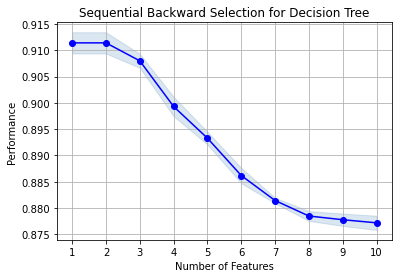

In [44]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig2 = plot_sfs(ffs_dtree.get_metric_dict(), kind='std_dev')

plt.title('Sequential Backward Selection for Decision Tree')
plt.grid()
plt.show()

In [45]:
download=pd.DataFrame.from_dict(ffs_mlp.get_metric_dict()).T
download.to_csv("backwardfloating.mlp.csv")
pd.DataFrame.from_dict(ffs_mlp.get_metric_dict()).T
#ci_bound = cinfidence interval
#std_dev = standard deviation
#std_err = standard error

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)","[0.9104207400970381, 0.9135364219219765, 0.917...",0.914039,"(course_id, source_browser, source_server, eve...",0.002795,0.002175,0.001087
9,"(0, 1, 2, 3, 4, 6, 7, 8, 9)","[0.9141521309117064, 0.9139705102365545, 0.918...",0.915216,"(course_id, source_browser, source_server, eve...",0.002162,0.001682,0.000841
8,"(0, 1, 2, 4, 6, 7, 8, 9)","[0.9139590213415716, 0.9145117784571121, 0.918...",0.915547,"(course_id, source_browser, source_server, eve...",0.002095,0.00163,0.000815
7,"(1, 2, 4, 6, 7, 8, 9)","[0.9117422451725518, 0.9142320609584341, 0.918...",0.91501,"(source_browser, source_server, event_discussi...",0.002952,0.002297,0.001148
6,"(1, 2, 4, 6, 7, 8)","[0.9134328358208955, 0.9133892423366107, 0.915...",0.914512,"(source_browser, source_server, event_discussi...",0.001327,0.001032,0.000516
5,"(1, 2, 4, 6, 7)","[0.9142734829296135, 0.9145153260792264, 0.917...",0.915048,"(source_browser, source_server, event_discussi...",0.001797,0.001398,0.000699
4,"(1, 2, 4, 7)","[0.9100309484798835, 0.9139708496267329, 0.918...",0.913983,"(source_browser, source_server, event_discussi...",0.003417,0.002659,0.001329
3,"(2, 7, 9)","[0.911699859037843, 0.9133612431703683, 0.9171...",0.91382,"(source_server, event_problem, event_wiki)",0.002405,0.001871,0.000936
2,"(2, 7)","[0.9121892824448983, 0.913670091324201, 0.9159...",0.91356,"(source_server, event_problem)",0.001648,0.001282,0.000641
1,"(2,)","[0.909496884791299, 0.9076495945057352, 0.9139...",0.910289,"(source_server,)",0.00268,0.002085,0.001042


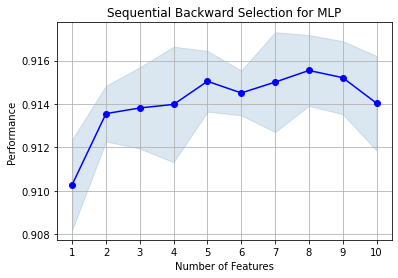

In [46]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig3 = plot_sfs(ffs_mlp.get_metric_dict(), kind='std_dev')

plt.title('Sequential Backward Selection for MLP')
plt.grid()
plt.show()

In [47]:
download=pd.DataFrame.from_dict(ffs_randomforest.get_metric_dict()).T
download.to_csv("backwardfloating.randomforest.csv")
pd.DataFrame.from_dict(ffs_randomforest.get_metric_dict()).T
#ci_bound = cinfidence interval
#std_dev = standard deviation
#std_err = standard error

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)","[0.9089990253763129, 0.9096018735362998, 0.913...",0.911001,"(course_id, source_browser, source_server, eve...",0.00231,0.001797,0.000898
9,"(1, 2, 3, 4, 5, 6, 7, 8, 9)","[0.9106665703762548, 0.9092222141980211, 0.914...",0.911306,"(source_browser, source_server, event_access, ...",0.002421,0.001883,0.000942
8,"(1, 2, 3, 4, 5, 6, 8, 9)","[0.909740517521383, 0.90960268485439, 0.914872...",0.911114,"(source_browser, source_server, event_access, ...",0.002504,0.001948,0.000974
7,"(1, 2, 3, 4, 5, 6, 8)","[0.9089530685920577, 0.9090055607712861, 0.913...",0.910294,"(source_browser, source_server, event_access, ...",0.002215,0.001723,0.000861
6,"(1, 2, 3, 4, 6, 8)","[0.9076049614869998, 0.9078152688872011, 0.911...",0.909398,"(source_browser, source_server, event_access, ...",0.002056,0.001599,0.0008
5,"(1, 2, 4, 6, 8)","[0.9075282854656224, 0.9063882242041912, 0.909...",0.907673,"(source_browser, source_server, event_discussi...",0.001217,0.000947,0.000474
4,"(2, 4, 7, 9)","[0.9056985825860573, 0.9061245161523712, 0.908...",0.906674,"(source_server, event_discussion, event_proble...",0.001753,0.001364,0.000682
3,"(2, 4, 9)","[0.9051346499102334, 0.9036296269649987, 0.907...",0.905106,"(source_server, event_discussion, event_wiki)",0.001666,0.001296,0.000648
2,"(2, 9)","[0.9089539928999175, 0.9080356822985707, 0.911...",0.908722,"(source_server, event_wiki)",0.001636,0.001273,0.000637
1,"(2,)","[0.910055946062258, 0.9102942234371628, 0.9153...",0.911249,"(source_server,)",0.002624,0.002042,0.001021


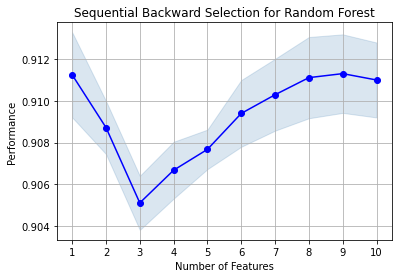

In [48]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig4 = plot_sfs(ffs_randomforest.get_metric_dict(), kind='std_dev')

plt.title('Sequential Backward Selection for Random Forest')
plt.grid()
plt.show()

In [57]:
download=pd.DataFrame.from_dict(ffs_svc.get_metric_dict()).T
download.to_csv("backwardfloating.SVM.csv")
pd.DataFrame.from_dict(ffs_svc.get_metric_dict()).T
#ci_bound = cinfidence interval
#std_dev = standard deviation
#std_err = standard error

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)","[0.9127770255825555, 0.9142795990439839, 0.917...",0.914948,"(course_id, source_browser, source_server, eve...",0.002057,0.001601,0.0008
9,"(0, 1, 3, 4, 5, 6, 7, 8, 9)","[0.9131967943009794, 0.9144385026737968, 0.917...",0.915249,"(course_id, source_browser, event_access, even...",0.001937,0.001507,0.000753
8,"(0, 1, 3, 5, 6, 7, 8, 9)","[0.913249492322491, 0.9144936325045481, 0.9179...",0.915371,"(course_id, source_browser, event_access, even...",0.001995,0.001552,0.000776
7,"(1, 3, 5, 6, 7, 8, 9)","[0.9132882080513003, 0.9144936325045481, 0.917...",0.915392,"(source_browser, event_access, event_navigate,...",0.001983,0.001543,0.000771
6,"(1, 3, 5, 6, 7, 8)","[0.9130496757180528, 0.9141837644959857, 0.918...",0.91528,"(source_browser, event_access, event_navigate,...",0.002157,0.001678,0.000839
5,"(1, 3, 5, 6, 7)","[0.9127258472613236, 0.9139205255453605, 0.918...",0.915012,"(source_browser, event_access, event_navigate,...",0.002265,0.001762,0.000881
4,"(3, 5, 6, 7)","[0.9117363860062051, 0.913183050363818, 0.9173...",0.914334,"(event_access, event_navigate, event_page_clos...",0.002437,0.001896,0.000948
3,"(5, 6, 7)","[0.9118722271517302, 0.9119487908961594, 0.916...",0.91393,"(event_navigate, event_page_close, event_problem)",0.002482,0.001931,0.000966
2,"(5, 6)","[0.9097101500691808, 0.9094850563275171, 0.914...",0.911449,"(event_navigate, event_page_close)",0.002306,0.001794,0.000897
1,"(6,)","[0.9069546557849931, 0.9076571026227778, 0.909...",0.907802,"(event_page_close,)",0.000913,0.00071,0.000355


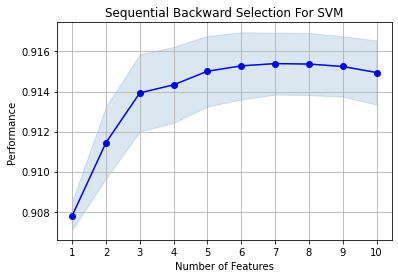

In [58]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig5 = plot_sfs(ffs_svc.get_metric_dict(), kind='std_dev')

plt.title('Sequential Backward Selection For SVM')
plt.grid()
plt.show()

In [51]:
download=pd.DataFrame.from_dict(ffs_knn.get_metric_dict()).T
download.to_csv("backwardfloating.knn.csv")
pd.DataFrame.from_dict(ffs_knn.get_metric_dict()).T
#ci_bound = cinfidence interval
#std_dev = standard deviation
#std_err = standard error

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)","[0.9052974145724101, 0.9031159420289855, 0.908...",0.905026,"(course_id, source_browser, source_server, eve...",0.002139,0.001664,0.000832
9,"(0, 1, 3, 4, 5, 6, 7, 8, 9)","[0.9028662420382165, 0.9048032407407407, 0.909...",0.905601,"(course_id, source_browser, event_access, even...",0.002859,0.002225,0.001112
8,"(0, 1, 3, 5, 6, 7, 8, 9)","[0.9049308522192456, 0.9055551531831679, 0.908...",0.906198,"(course_id, source_browser, event_access, even...",0.002502,0.001947,0.000973
7,"(0, 1, 3, 5, 6, 7, 8)","[0.9058895838605879, 0.9066772770020978, 0.908...",0.906682,"(course_id, source_browser, event_access, even...",0.002016,0.001569,0.000784
6,"(1, 3, 5, 6, 7, 8)","[0.9058895838605879, 0.9066772770020978, 0.908...",0.906682,"(source_browser, event_access, event_navigate,...",0.002016,0.001569,0.000784
5,"(1, 3, 4, 6, 7)","[0.904725802375537, 0.9054449542941793, 0.9094...",0.906183,"(source_browser, event_access, event_discussio...",0.002342,0.001822,0.000911
4,"(1, 3, 6, 7)","[0.9055593735305819, 0.9044590590445905, 0.907...",0.905902,"(source_browser, event_access, event_page_clos...",0.001539,0.001197,0.000599
3,"(2, 3, 7)","[0.902724016930145, 0.9044309296264117, 0.9081...",0.904801,"(source_server, event_access, event_problem)",0.002694,0.002096,0.001048
2,"(2, 6)","[0.9032211521119649, 0.9020359454670379, 0.905...",0.902641,"(source_server, event_page_close)",0.002229,0.001734,0.000867
1,"(2,)","[0.8742640716991037, 0.9018415876989093, 0.907...",0.898097,"(source_server,)",0.015469,0.012035,0.006018


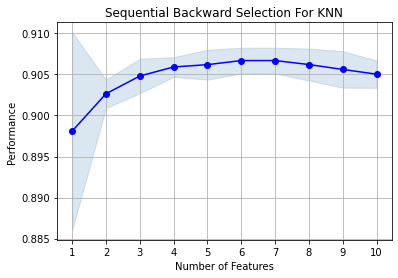

In [52]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig5 = plot_sfs(ffs_knn.get_metric_dict(), kind='std_dev')

plt.title('Sequential Backward Selection For KNN')
plt.grid()
plt.show()

In [53]:
download=pd.DataFrame.from_dict(ffs_lr.get_metric_dict()).T
download.to_csv("backwardfloating.lr.csv")
pd.DataFrame.from_dict(ffs_lr.get_metric_dict()).T
#ci_bound = cinfidence interval
#std_dev = standard deviation
#std_err = standard error

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)","[0.9115963536145856, 0.9127900815937269, 0.916...",0.913439,"(course_id, source_browser, source_server, eve...",0.002398,0.001866,0.000933
9,"(0, 1, 2, 3, 4, 5, 6, 7, 9)","[0.9115963536145856, 0.9127900815937269, 0.916...",0.913446,"(course_id, source_browser, source_server, eve...",0.002394,0.001862,0.000931
8,"(0, 1, 2, 4, 5, 6, 7, 9)","[0.9119485748596051, 0.9129421732683753, 0.917...",0.91384,"(course_id, source_browser, source_server, eve...",0.002296,0.001786,0.000893
7,"(0, 1, 2, 4, 5, 6, 9)","[0.9119734472652803, 0.9131278901479049, 0.917...",0.913901,"(course_id, source_browser, source_server, eve...",0.00223,0.001735,0.000868
6,"(1, 2, 4, 5, 6, 9)","[0.9119734472652803, 0.9131278901479049, 0.917...",0.913901,"(source_browser, source_server, event_discussi...",0.00223,0.001735,0.000868
5,"(2, 3, 4, 6, 9)","[0.9120774312056237, 0.9133535767248075, 0.916...",0.913805,"(source_server, event_access, event_discussion...",0.002133,0.00166,0.00083
4,"(2, 4, 6, 9)","[0.9121146852159175, 0.913135593220339, 0.9161...",0.913668,"(source_server, event_discussion, event_page_c...",0.001737,0.001351,0.000676
3,"(2, 4, 6)","[0.9119277065904197, 0.9131923606453207, 0.915...",0.91339,"(source_server, event_discussion, event_page_c...",0.001618,0.001259,0.000629
2,"(2, 4)","[0.9113307447935051, 0.9125829685072729, 0.915...",0.913101,"(source_server, event_discussion)",0.002083,0.001621,0.00081
1,"(2,)","[0.9102631857097557, 0.912184489910708, 0.9133...",0.911661,"(source_server,)",0.00136,0.001058,0.000529


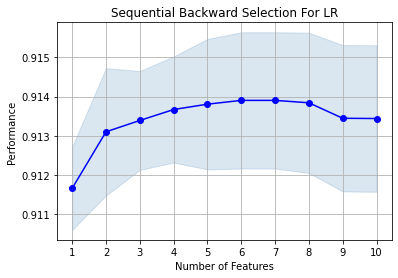

In [54]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig5 = plot_sfs(ffs_lr.get_metric_dict(), kind='std_dev')

plt.title('Sequential Backward Selection For LR')
plt.grid()
plt.show()